# Digit Recognizer Project

For this project, we will be building and training a machine learning learning model on th MNIST dataset of images. We will use a convolutional neural network as our model.

We will be following the Machine Learning Mastery tutorial by Jason Brownlee. 

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [1]:
#importing all necassary libraries




from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import  mnist
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from numpy import argmax


2024-03-29 20:02:38.065340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 20:02:38.065495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 20:02:38.253250: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


First we load the data, look at its shape, and then look at the first few examples.

In [2]:
(trainX, trainy),(testX,testy) = mnist.load_data()

print(f' Shape of trainX: {trainX.shape}')
print(f' Shape of trainy: {trainy.shape}')
print(f' Shape of trainX: {testX.shape}')
print(f' Shape of trainy: {testy.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
 Shape of trainX: (60000, 28, 28)
 Shape of trainy: (60000,)
 Shape of trainX: (10000, 28, 28)
 Shape of trainy: (10000,)


We can look at the first 10 examples in our dataset.

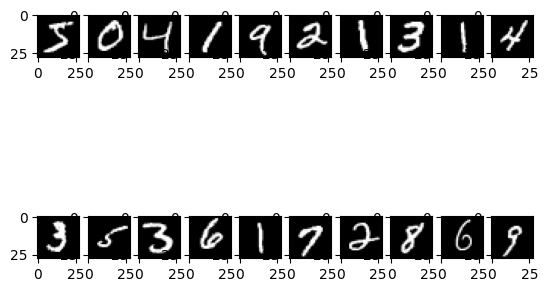

In [46]:
fig, ax = plt.subplots(2,10)
for i in range(20):
    ax[round(i * 1/20 + 1/200)   ,i%10 ].imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

Following the tutorial by Jason Brownlee on the website https://machinelearningmastery.com,
we first create a test harness, so that all we have to do
is vary our ML Algorithm, keeping our dataset,splitting procedure, and performance measure constant. We then can see which ML Model performs the best on average on our validation data.


In [6]:
def load_dataset():
    (X_train,y_train),(X_test,y_test) = mnist.load_data()
    
    
    X_train = X_train.reshape((X_train.shape[0],28,28,1))
    X_test = X_test.reshape((X_test.shape[0],28,28,1)) 
    
    
    y_train = tf.keras.utils.to_categorical(y_train)
    
    y_test = tf.keras.utils.to_categorical(y_test)
    
    
    return X_train , y_train, X_test , y_test
    
    
def prep_pixels(train , test ):
    
    train_norm  =  train.astype('float32')
    test_norm  =  test.astype('float32')
    
    
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    return train_norm , test_norm
    
    
#=========================== 
#This is the part of the code that we change, 
# to evaluate different ML Models and ALgorithms.
# The code here is the final model we wnt with.

#Other models can be found below this cell.

    
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

    model.add(MaxPooling2D((2, 2)))
    
    
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2))) 
    
    
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


#===========================

def evaluate_model(dataX, dataY, n_folds = 5):
    
    scores, histories = list() , list() #Initialize arrays of histories and scores
    
    kfold = KFold(n_folds,shuffle = True, random_state = 1) #Initialize a kold object that will split our data.
    
    for train_ix, test_ix in kfold.split(dataX): # When we apply the KFold object to our data, we get a iterable.
        
        # The iterable above allows us to loof through the inices of the different folds.
        
        model = define_model() #The model defined for the current fold
        
        
        X_train, y_train, X_test , y_test = dataX[train_ix] , dataY[train_ix] , dataX[test_ix], dataY[test_ix]
        
        # The above code selelcts based on th the KFold objects indices.
        
        
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        
        #The above code is the current folds fitted model.
        
        _, acc = model.evaluate(X_test, y_test , verbose = 0   ) #Evaluating model on current folds tests set.
        
        print(f'accuaracy: {acc}   ')
        
        scores.append(acc)
        
        histories.append(history)
        
    return scores, histories


def summerize_diagnostics( histories):
    
    fig, axs = plt.subplots(2,1)
    
    
    print(len(histories))
    
    for i in range(len(histories)):
        
        #We want to plot the learning behaviour of the models for meach fold.
        axs[0].plot(  histories[i].history['loss'], color = 'b', label = 'train_loss')
        
        axs[0].plot(  histories[i].history['val_loss'], color = 'c', label = 'train_val_loss')
        
    for i in range(len(histories)):
        
        #We want to plot the learning behaviour of the models for meach fold.
        axs[1].plot(  histories[i].history['accuracy'], color = 'b', label = 'train_accuracy')
        
        axs[1].plot(  histories[i].history['val_accuracy'], color = 'c', label = 'train_val_acc')
        
    axs[0].legend()
    axs[1].legend()
    
    plt.show()


def summerize_performance(scores):
    
    plt.boxplot(scores)
    plt.show()
    
    print(np.mean(scores))
    print(np.std(scores))


### Baseline model

In [ ]:
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

### Model with Batch Normalization Layer

In [ ]:
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

#     model.add(BatchNormalization()) #this is the change

#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

### Model with extra convolution layers

In [ ]:
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))


#     #this is the change
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(MaxPooling2D((2, 2))) 

#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# Baseline model
First we have the output of running the test harness on the baseline model.

We run the code below with the baseline definition of the define_model function.



In [1]:
# def run_test_harness():
    
#     X_train, y_train, X_test, y_test = load_dataset()
#     print('load done ====')
    
#     X_train, X_test = prep_pixels(X_train,X_test)
    
#     print('prep_pixel done ====')
    
    
#     model = define_model()
#     scores, histories = evaluate_model(X_train,y_train,n_folds = 5)

#     summerize_diagnostics(histories)
    
#     summerize_performance(scores)
    
#  
    
    
    
# run_test_harness()

IndentationError: unexpected indent (1354334297.py, line 14)

load done ====
prep_pixel done ====


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


accuaracy: 0.9855833053588867   
accuaracy: 0.9872499704360962   
accuaracy: 0.9860000014305115   
accuaracy: 0.9884166717529297   
accuaracy: 0.9854999780654907   
scores, histories loaded ====
5


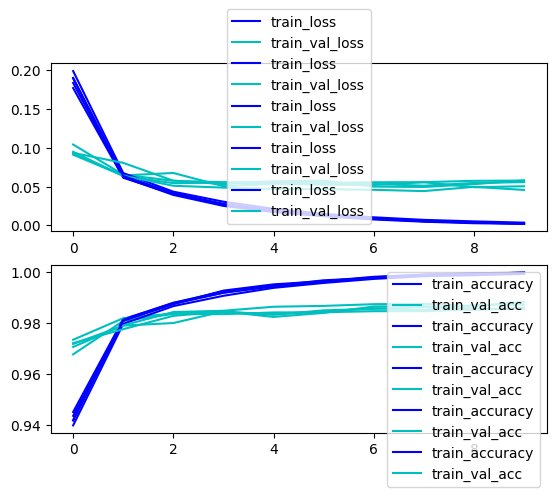

s d
s p


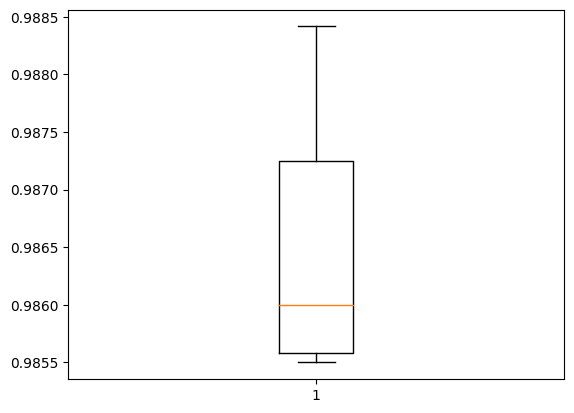

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [248]:
# run_test_harness()

So we yhave the trained model. Now we want to predict using it.

Our mean accuracy for the first model: 0.9865499854087829

In [4]:
4.932749927043915/5

0.9865499854087829

# Using Batch Normalization

Next we run the test harness using the model with batch normalization.

Mean with batcfh normalization layer
0.986899995803833

We run the code below with the new defintion of the define_model function.


In [ ]:
# def run_test_harness():
    
#     X_train, y_train, X_test, y_test = load_dataset()
#     print('load done ====')
    
#     X_train, X_test = prep_pixels(X_train,X_test)
    
#     print('prep_pixel done ====')
    
    
#     model = define_model()
#     scores, histories = evaluate_model(X_train,y_train,n_folds = 5)

#     summerize_diagnostics(histories)
    
#     summerize_performance(scores)
    
#  
    
    
    
# run_test_harness()

load done ====
prep_pixel done ====
accuaracy: 0.984416663646698   
accuaracy: 0.9869999885559082   
accuaracy: 0.987333357334137   
accuaracy: 0.9884999990463257   
accuaracy: 0.9872499704360962   
scores, histories loaded ====
5


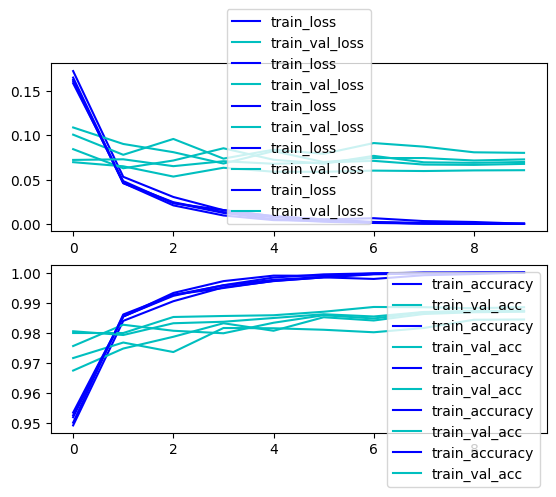

s d
s p


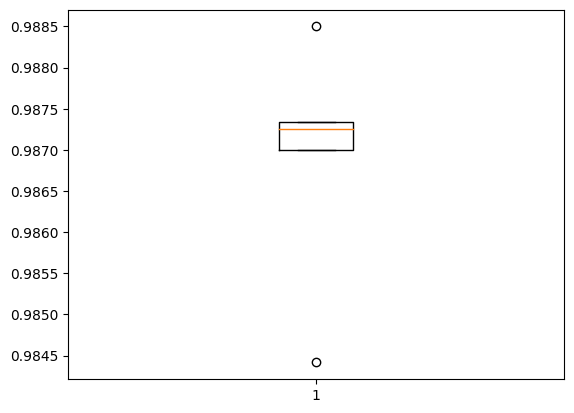

In [45]:
# run_test_harness()

# Increased Model depth

Finally, we run the test harness with the model with extra convolution layers.

With increased model depth:

mean acc:0.9898499965667724

standard dev: 0.00045153292627370036

We run the code below with the new defintion of the define_model function.

In [ ]:
# def run_test_harness():
    
#     X_train, y_train, X_test, y_test = load_dataset()
#     print('load done ====')
    
#     X_train, X_test = prep_pixels(X_train,X_test)
    
#     print('prep_pixel done ====')
    
    
#     model = define_model()
#     scores, histories = evaluate_model(X_train,y_train,n_folds = 5)

#     summerize_diagnostics(histories)
    
#     summerize_performance(scores)
    
#  
    
    
    
# run_test_harness()

load done ====
prep_pixel done ====


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


accuaracy: 0.9890833497047424   
accuaracy: 0.9900000095367432   
accuaracy: 0.9904166460037231   
accuaracy: 0.9896666407585144   
accuaracy: 0.9900833368301392   
scores, histories loaded ====
5


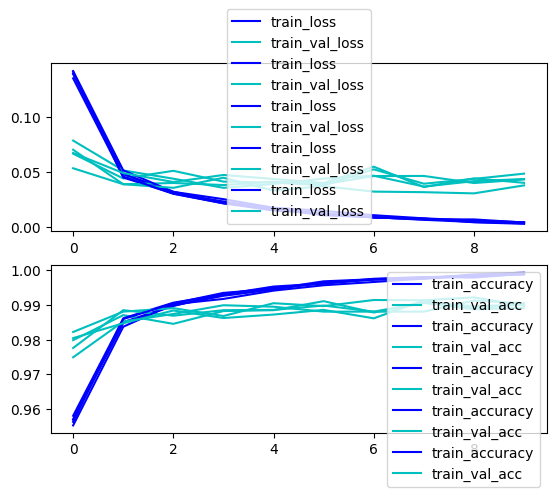

0.9877349936962128
s d
s p


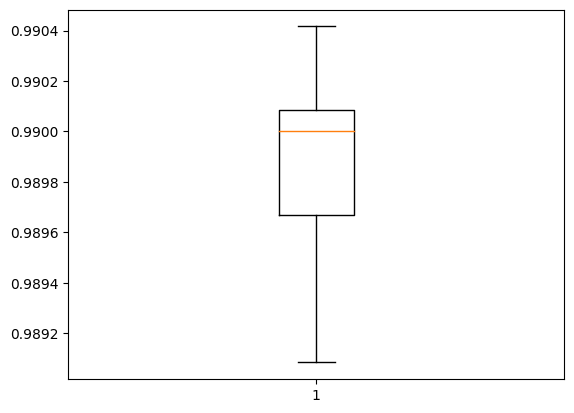

0.9898499965667724
0.00045153292627370036


In [51]:
# run_test_harness()

With increased model depth:

Mean acc:0.9898499965667724

Standard dev: 0.00045153292627370036

# Training model on all of the data.

We use the model with the extra layers.

In [ ]:
# def run_test_harness():
    
#     X_train, y_train, X_test, y_test = load_dataset()
#     print('load done ====')
    
#     X_train, X_test = prep_pixels(X_train,X_test)
    
#     print('prep_pixel done ====')
    
    
#     model = define_model()
#     model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
#     model.save('final_model_2.h5')
    
    
    
# run_test_harness()

In [68]:
# run_test_harness()

load done ====
prep_pixel done ====


# Evaluating Model on Test Data

We want to evaluate oir model on test data now.

In [ ]:
#First we want to load the model
model = load_model('/kaggle/input/cnndigitrecognizer/keras/digit_recognizer_2/1/final_model_2.h5')

#Then we want to transform our data.



In [14]:
# def run_test_harness():
    
#     X_train, y_train, X_test, y_test = load_dataset()
#     print('load done ====')
    
#     X_train, X_test = prep_pixels(X_train,X_test)
    
#     print('prep_pixel done ====')
    
    
#     model = define_model()
#     model = load_model('/kaggle/input/cnndigitrecognizer/keras/digit_recognizer_2/1/final_model_2.h5')
    
#     _, acc = model.evaluate(X_test, y_test, verbose = 0)
    
#     print(acc*100)
    
    
    
# run_test_harness()


load done ====
prep_pixel done ====


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


99.08999800682068


# Making Predicitons

In [16]:
#So we wnat to make a function that gets our image puts it into matrix format,

# and then transforms it



def load_image(filename):
    
    # load image
    img = load_img(filename, color_mode = 'grayscale', target_size=(28, 28))

    # convert to array
    img = img_to_array(img)
    #reshape to a single image with one channel

    img = img.reshape((1,28,28,1))

    # Prepare pixel data
    img = img.astype('float32')

    img = img/255.0
    
    # return image
    return img

In [17]:
img = load_image('/kaggle/input/sample-image/sample_image.png')

In [18]:
model = load_model('/kaggle/input/cnndigitrecognizer/keras/digit_recognizer_2/1/final_model_2.h5')

In [20]:
np.argmax(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


7

This is our baseline model:

In [ ]:
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

This is our model with a batch normalization layer.

In [ ]:
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(BatchNormalization())
#     model.add(Dense(10, activation='softmax'))

#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

This is our model with extra convolution layers.

In [ ]:
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

#     model.add(MaxPooling2D((2, 2)))
    
    
    
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(MaxPooling2D((2, 2))) 
    
    
    
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [1]:
model.count_params()


NameError: name 'model' is not defined

In [49]:
model.summary()

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_65 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,232 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# def run_test_harness():
    
#     X_train, y_train, X_test, y_test = load_dataset()
#     print('load done ====')
    
#     X_train, X_test = prep_pixels(X_train,X_test)
    
#     print('prep_pixel done ====')
    
    
#     model = define_model()
# #     fit model
#     model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
# #     save model
#     model.save('final_model_2.h5')